In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.datasets import load_iris

In [78]:
iris = load_iris()

In [79]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [80]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [81]:
# to show column names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [82]:
# to show what is op

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
# to show op

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
df['target']=iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [87]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [88]:
import seaborn as sns

In [107]:
df.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

AttributeError: 'str' object has no attribute 'get'

In [108]:
df0= df[df.target == 0].tail()
df1= df[df.target == 1].tail()
df2= df[df.target == 2].tail()

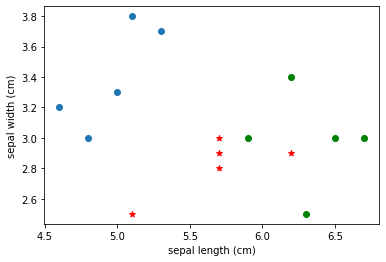

In [109]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',c='r')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='o',c='g')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

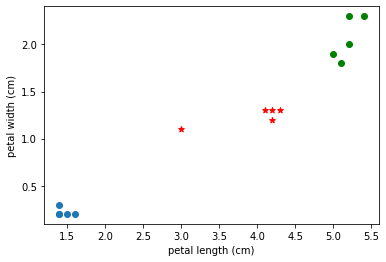

In [110]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',c='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='o',c='g')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

In [111]:
X = df.drop('target', axis=1)
y = df.target

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
df.shape

(150, 5)

In [116]:
model=KNeighborsClassifier(n_neighbors=12)

In [133]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [134]:
model.score(X_test,y_test)

0.98

In [135]:
score_list=[]
for i in range(5,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    score_list.append(score)

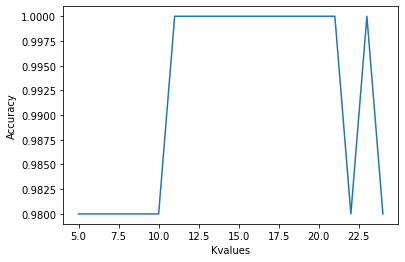

In [136]:
plt.plot(range(5,25),score_list)
plt.xlabel("Kvalues")
plt.ylabel("Accuracy")
plt.show()

In [130]:
cr=df.corr()

<AxesSubplot:>

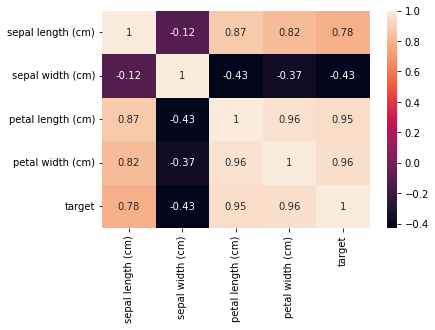

In [124]:
import seaborn as sns
sns.heatmap(cr,annot=True)

In [125]:
y_pred=model.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

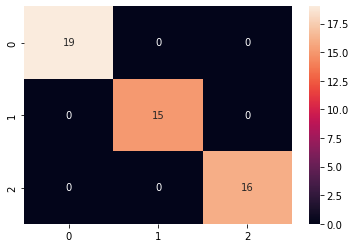

In [127]:
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)